In [2]:
import csv
import random
import datetime

productos= ['Producto 1', 'Producto 2', 'Producto 3']
paises= ['País 1', 'País 2', 'País 3']
ventas=[]

for i in range(1000):
    venta= {}
    venta['Fecha']= datetime.date(2022, random.randint(1, 12),
                                    random.randint(1,28))
    venta['Producto']= random.choice(productos)
    venta['País']= random.choice(paises)
    venta['Ventas']= random.randint(100,10000) 
    ventas.append(venta)


with open('prueba_archivo_csv', mode= 'w', newline='') as prueba_archivo_csv:
    nombres_columnas= ['Fecha', 'Producto', 'País', 'Ventas']
    escritor_csv= csv.DictWriter(prueba_archivo_csv, fieldnames= nombres_columnas)
    escritor_csv.writeheader()

    for venta in ventas:
        escritor_csv.writerow(venta)




In [3]:
import pandas as pd
import datetime as dt

class DatosVentas:
    def __init__(self, ruta):
        self.datos= pd.read_csv(ruta, sep= ",", encoding="")

    def procesar_datos(self):
        self.datos['Fecha']= pd.to_datetime(self.datos['Fecha'])
        self.datos['Mes']= self.datos['Fecha'].dt.month
        self.datos['Año']= self.datos['Fecha'].dt.year

    def obtener_datos(self):
        return self.datos
    



In [4]:
ventas_lunes= DatosVentas('prueba_archivo_csv')
ventas_martes= DatosVentas('prueba_archivo_csv')

#print(ventas_martes.datos)

#ventas_lunes.obtener_datos()
#ventas_lunes.datos
#ventas_lunes.procesar_datos()
ventas_lunes.datos
ventas_lunes.procesar_datos()
ventas_lunes.datos

,Fecha,Producto,País,Ventas,Mes,Año
0,2022-12-07,Producto 1,País 3,5548,12,2022
1,2022-02-18,Producto 2,País 3,977,2,2022
2,2022-08-11,Producto 1,País 3,9921,8,2022
3,2022-09-26,Producto 1,País 2,393,9,2022
4,2022-05-22,Producto 2,País 3,7616,5,2022
...,...,...,...,...,...,...
995,2022-01-17,Producto 1,País 3,254,1,2022
996,2022-12-16,Producto 2,País 2,4340,12,2022
997,2022-10-21,Producto 2,País 2,814,10,2022
998,2022-07-18,Producto 2,País 3,6750,7,2022


In [6]:
class AnalizadorVentas:
    def __init__(self, datos_ventas):
        self.datos= datos_ventas.datos

    def obtener_ventas_totales(self):
        return self.datos['Ventas'].sum()  

#    #las ventas promedio por mes
    def obtener_ventas_promedio_por_mes(self):
        return self.datos.groupby(['Año','Mes'])['Ventas'].mean(
        ).reset_index()

#    #los productos más vendidos
    def obtener_productos_mas_vendidos(self,n):
        return self.datos.groupby('Producto')['Ventas'].sum(
        ).nlargest(n).reset_index()
    
    

In [7]:
#toma como argumento un objeto de la clase DatosVentas
analizador_v= AnalizadorVentas(ventas_lunes)

#Retorna la suma total de las ventas
#analizador_v.obtener_ventas_totales()

#Retorna un objeto DataFrame que contiene el promedio de 
# ventas por mes y año.
#analizador_v.obtener_ventas_promedio_por_mes()

#Retorna un objeto DataFrame que contiene los n (los numero 
#de fila por indice con el productos más vendidos, que se 
# muestra de forma descendente, es decir, del producto mas vendido
# al menos vendido.
analizador_v.obtener_productos_mas_vendidos(2)

,Producto,Ventas
0,Producto 1,1681486
1,Producto 2,1667566


In [8]:

import matplotlib.pyplot as plt
import numpy as np

class VisualizadorVentas:
#Estos métodos deberán graficar la información obtenida en los 
# métodos de la clase "AnalizadorVentas" y mostrar un mapa de 
# calor con las ventas por país
    def __init__(self,datos_ventas):
        self.datos_ventas = datos_ventas.datos
        

    def graficar_ventas_totales(self):
        self.datos_ventas.groupby(['Fecha'])['Ventas'].sum().reset_index(
        ).plot(x= 'Fecha', y= 'Ventas', kind='line', xlabel='Fecha',
               ylabel='Ventas', title='Ventas totales por fecha')

    def graficar_ventas_totales2(self):
        datos_por_fecha= self.datos_ventas.groupby(['Fecha'])['Ventas'
            ].sum().reset_index()
        
        plt.plot(datos_por_fecha.Fecha, datos_por_fecha.Ventas, color='grey',
        marker= '*', linestyle='--')

        plt.title('Ventas totales por fecha')
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.show()


    def graficar_ventas_totales3(self):
        #hace lo mismo que f'mes: {mes}'el metodo anterior
        datos_por_fecha = self.datos_ventas.groupby(["Fecha"])["Ventas"].sum(
        ).reset_index()

        plt.plot(datos_por_fecha.Fecha, datos_por_fecha.Ventas, color='green', 
                 marker='o')
        plt.title('"Ventas totales por fecha"')
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.show()


    def graficar_ventas_promedio_por_mes(self):
        ventas_por_mes= self.datos_ventas.groupby(['Año', 
        'Mes'])['Ventas'].mean().reset_index()

        plt.plot(ventas_por_mes['Mes'],ventas_por_mes['Ventas'])

        plt.title('Ventas promedio por mes')

        plt.xlabel('Mes')

        plt.ylabel('Ventas')

        plt.show()

    def graficar_productos_mas_vendidos(self,n):
        productos_mas_vendidos= self.datos_ventas.groupby('Producto')[
        'Ventas'].sum().nlargest(n).reset_index()

        plt.bar(productos_mas_vendidos['Producto'], productos_mas_vendidos
                ['Ventas'])
        
        plt.title('Los {} productos mas vendidos'.format(n))

        plt.xlabel('Producto')
        
        plt.ylabel('Ventas')
        
        plt.show()

    def graficar_mapa_ventas(self):
        datos_por_pais= self.datos_ventas.groupby('País')['Ventas'
        ].sum().reset_index()

        data= np.array([datos_por_pais.Ventas])
        fig, ax= plt.subplots()
        im= ax.imshow(data, cmap= 'summer')

        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                text= ax.text(j,i, data[i,j],
                              ha= 'center', va='center', color= 'black')
            
            cbar= ax.figure.colorbar(im, ax=ax)

            ax.set_xticks(np.arange(data.shape[1]))
            ax.set_xticklabels(['País 1', 'País 2', 'País 3'])

            ax.set_yticks([])

            plt.setp(ax.get_xticklabels(), rotation= 90, ha= 'right',
                     rotation_mode= 'anchor')
            
            plt.tight_layout()

            plt.show()




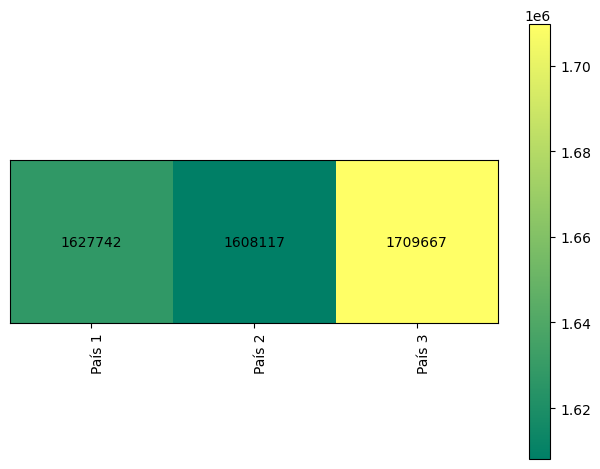

,Fecha,Producto,País,Ventas,Mes,Año
0,2022-12-07,Producto 1,País 3,5548,12,2022
1,2022-02-18,Producto 2,País 3,977,2,2022
2,2022-08-11,Producto 1,País 3,9921,8,2022
3,2022-09-26,Producto 1,País 2,393,9,2022
4,2022-05-22,Producto 2,País 3,7616,5,2022
...,...,...,...,...,...,...
995,2022-01-17,Producto 1,País 3,254,1,2022
996,2022-12-16,Producto 2,País 2,4340,12,2022
997,2022-10-21,Producto 2,País 2,814,10,2022
998,2022-07-18,Producto 2,País 3,6750,7,2022


In [9]:
v= VisualizadorVentas(ventas_lunes)

#v.graficar_ventas_totales()
#
#v.graficar_ventas_totales2()
#
#v.graficar_ventas_totales3()

#v.graficar_ventas_promedio_por_mes()

#v.graficar_productos_mas_vendidos(2)

v.graficar_mapa_ventas()
v.datos_ventas



In [40]:
import csv
class GeneradorCSV:
    def __init__(self, datos_ventas):
        self.datos_ventas = datos_ventas

    def generar_csv(self):
        with open('ventas_2022.csv', mode= 'w') as archivo:
            escritor= csv.writer(archivo)

            #Selecciona del dataframe estructurado, columna Ventas y suma todo
            ventas_totales= self.datos_ventas['Ventas'].sum()

            #usamos f (format) porque escribe en el csv (el print no)
            #writerow: escribe la cadena en la fila (archivo csv)
            escritor.writerow([f'Las ventas para el total del año 2022 han sido: {ventas_totales}'])

            #Escribe la cadena en escritor (archivo csv) 
            escritor.writerow(['Las ventas mensuales: '])

            #agrupar las ventas por mes
            #suma las ventas y guarda los dos valores en mes 
            # y fecha (orden importante)
            for mes, ventas in self.datos_ventas.groupby('Mes')['Ventas'].sum().items():
                #escribe el resultado de mes y ventas en archivo csv por cada 
                #iteracion
                escritor.writerow([f'mes: {mes}', f'{ventas:,f}'])




In [41]:
#creamos la variable para guardar la ruta del archivo csv
ruta_archivo= '/home/usuario/Escritorio/Programacion/Inicio_Librerias_en_Python/aplicacion_ventas_profesora/prueba_archivo_csv'

#creamos el objeto y pasamos por parametro la ruta_archivo
datos_ventas= DatosVentas(ruta_archivo)

#del objeto usamos la funcion procesar_datos para usar los meses en el archivo
datos_ventas.procesar_datos()

#creamos el nuevo objeto de la clase GeneradorCSV
#pasamos por parametro el objeto con el metodo de la clase DatosVentas
generador_csv= GeneradorCSV(datos_ventas.obtener_datos())

#ejecutamos el objeto con de la clase GeneradorCSV para
#realizar el archivo
generador_csv.generar_csv()